### **K-Nearest Neighbors (KNN)**

Es un algoritmo muy utilizado en IA, especialmente para tareas de clasificación y regresión. Se usa con un conjunto de datos que ya han sido clasificados en diferentes categorías, KNN se para clasificar un nuevo punto de datos en función de sus vecinos más cercanos en el conjunto de datos.

`Pasos a seguir:`
<br>
Seleccionar el valor de K: K representa el número de vecinos más cercanos que se considerarán para la clasificación.<br>
Calcular la distancia: Se calcula la distancia entre el nuevo punto de datos y cada uno de los puntos del conjunto de datos.<br>
Identificar los vecinos más cercanos: Se seleccionan los K puntos más cercanos al nuevo punto de datos.<br>
Asignar una clase: Se asigna al nuevo punto de datos la clase más común entre sus K vecinos más cercanos.<br>

`EJEMPLOS DE USO`
<br>
Recomendación de productos: Un sitio web de comercio electrónico podría utilizar KNN para recomendar productos a un usuario en función de los productos que ha comprado o visto anteriormente.

In [ ]:
!pip3 install numpy pandas matplotlib scikit-learn imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
iris = load_iris()
X = iris.data  # Usar las cuatro características
y = iris.target

# Crear un DataFrame para visualizar mejor
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar las primeras filas de los datos escalados
pd.DataFrame(X_scaled, columns=iris.feature_names).head()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [4]:
# Definir el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:\n', conf_matrix)

# Informe de clasificación
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Informe de Clasificación:\n', class_report)

Precisión: 1.00
Matriz de Confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Informe de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[<matplotlib.lines.Line2D object at 0x0000021A2C1C1D30>, <matplotlib.lines.Line2D object at 0x0000021A2C1C3080>, <matplotlib.lines.Line2D object at 0x0000021A2C1C3200>]


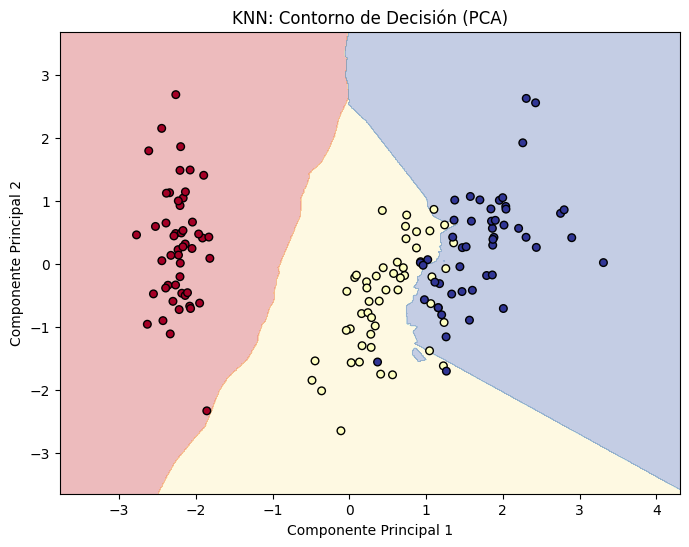

In [6]:
# Aplicar PCA para reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Entrenar el modelo KNN nuevamente con los datos transformados para la visualización
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Crear una malla de puntos para dibujar el contorno
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir en toda la malla
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar el contorno y puntos
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.RdYlBu)

# Añadir etiquetas
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('KNN: Contorno de Decisión (PCA)')

print(scatter.legend_elements()[0])
# plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
plt.show()


In [7]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Crear un conjunto de datos de ejemplo
productos = {
    'Producto': ['Laptop', 'Teléfono', 'Tablet', 'Smartwatch', 'Auriculares', 'TV'],
    'Precio': [1000, 800, 500, 300, 200, 150],
    'Popularidad': [10, 8, 6, 4, 2, 1]
}
df_productos = pd.DataFrame(productos)

# Crear un conjunto de datos de ejemplo de compras del usuario
compras_usuario = {
    'Producto': ['Laptop', 'Teléfono', 'Auriculares']
}
df_compras_usuario = pd.DataFrame(compras_usuario)

# Definir una función para recomendar productos al usuario utilizando KNN
def recomendar_productos(df_productos, df_compras_usuario, k=3):
    # Preprocesamiento de datos
    X = df_productos[['Precio', 'Popularidad']]
    y = df_productos['Producto']
    X_usuario = df_compras_usuario.merge(df_productos, on='Producto', how='left')[['Precio', 'Popularidad']].fillna(0)
    
    # Entrenar el modelo KNN
    modelo_knn = NearestNeighbors(n_neighbors=k)
    
    modelo_knn.fit(X)
    
    # Encontrar los k vecinos más cercanos
    _, indices = modelo_knn.kneighbors(X_usuario)
    print(modelo_knn.kneighbors(X_usuario))
    
    # Mostrar los productos recomendados
    print("Productos recomendados:")
    for i in indices[0]:
        print("- {}".format(df_productos.iloc[i]['Producto']))

# Llamar a la función de recomendación de productos
recomendar_productos(df_productos, df_compras_usuario, k=3)

(array([[  0.        , 200.00999975, 500.01599974],
       [  0.        , 200.00999975, 300.00666659],
       [  0.        ,  50.009999  , 100.019998  ]]), array([[0, 1, 2],
       [1, 0, 2],
       [4, 5, 3]], dtype=int64))
Productos recomendados:
- Laptop
- Teléfono
- Tablet
